## Model logistické regrese na upravené datové sadě

In [1]:
from webpages.preprocessing import Preprocessor, print_metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

Načtení dat

In [2]:
preprocessor = Preprocessor('../data_2')
X_train, X_val, X_test, y_train, y_val, y_test, X_train_all, X_val_all, X_test_all = preprocessor.get_predictions_dataframe()

Odstranění chybějících hodnot

In [3]:
X_train['is_winner'] = y_train
X_train.dropna(inplace=True)
y_train = X_train['is_winner']
X_train.drop(columns=['is_winner'], inplace=True)

Vytvoření dummy proměnných

In [4]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train_dummies = enc.transform(X_train)

In [5]:
y_train = y_train.astype("str")

Vytvoření a trénování modelu

In [6]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train_dummies, y_train)

In [7]:
X_val['is_winner'] = y_val
X_val.dropna(inplace=True)
y_val = X_val['is_winner']
X_val.drop(columns=['is_winner'], inplace=True)
X_val_dummies = enc.transform(X_val)

In [8]:
predictions = clf.predict(X_val_dummies)

Výpis metrik

Balanced accuracy: 0.49600511801859565
F1 score micro: 0.530952380952381
F1 score macro: 0.4149797427720938
RocAuc score: 0.5057948994032311
Confusion matrix:


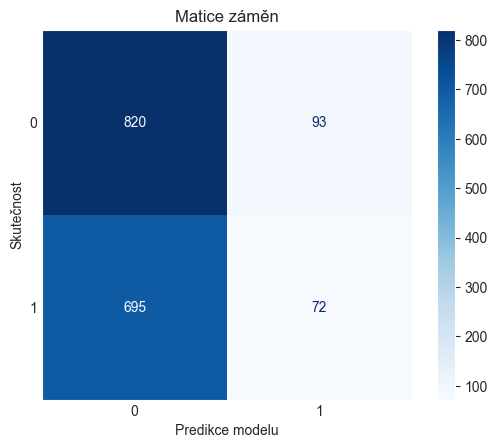

In [9]:
print_metrics(clf, X_val_dummies, y_val, retype_pred=True)